# Tensorflow & Keras

`Tensorflow` & `Keras` là framework được sử dụng rộng rãi trong deep learning - keras là tầng interface giúp cho quá trình làm việc và training model với deep learning sử dụng tensorflow được dễ dàng hơn.

Keras ra đời từ 3/2015 và thiết kế trên nền của `theano` trong khi `tensorflow` đến 11/2015 mới bắt đầu ra đời. Sự phát triển nhanh chóng của `tensorflow` dần thay thế `theano`, và dần dần, keras chỉ sử dụng `tensorlow` là backend. Thông qua `tensorflow`, keras có thể tương tác với cả GPU/TPU hoặc CPU truyền thống trong các mô hình `deep learning` để tăng tốc độ xây dựng mô hình.

![](image/p03-01-keras-tf.png)

Với kiến trúc như trên, `keras` & `tensorflow` sẽ chia thành 2 lớp xử lý các vấn đề khác nhau.

**Low-level tensor**: Xử lý thông qua tensorflow

- Tensor
- Các phép toán với tensor như `relu`, `dot`, `matmul`
- Tối ưu & tính toán đạo hàm - `backpropagation`

**High level deep learning**: Xử lý thông qua keras

- Xác định kiến trúc và layers trong mạng deep learning
- Xác định `loss function`
- Xác định thuật toán tối ưu `optimizer`
- Xác định chỉ số để đánh giá mô hình
- Xác định `training loop` để tối ưu hóa theo từng mini-batch

## Tensorflow

### TensorFlow cơ bản

In [1]:
# Tạo tensor 1
import tensorflow as tf
x = tf.ones(shape = (2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
# Tạo tensor random
y = tf.random.normal(shape = (3,2), mean = 2, stddev = 1)
print(y)

tf.Tensor(
[[1.3243942 2.5074534]
 [3.0319946 2.2464826]
 [2.031513  2.4088607]], shape=(3, 2), dtype=float32)


Cấu trúc tạo tensor rất giống với numpy, khác biệt lớn nhất là trong tensor ta không thể thực hiện phép `assign`. Kết quả sau sẽ báo lỗi

In [3]:
# error
y[1, 1] = 0

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

Để thực hiện tính toán với tensor, phải sử dụng class `Variable`

In [4]:
x = tf.Variable(initial_value = tf.random.normal((2, 2), mean = 0, stddev = 1))
print(x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.606645 ,  0.6143792],
       [-0.1333074,  1.4048557]], dtype=float32)>


In [5]:
# Assign x(0, 0)
x[0, 0].assign(1)
print(x)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.       ,  0.6143792],
       [-0.1333074,  1.4048557]], dtype=float32)>


**Các phép toán trong tensorflow**

In [6]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
print(a)
print(b + c)
print(tf.matmul(a, b))

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)


Sư khác biệt cơ bản giữa `tensorflow` và `numpy` nằm ở khả năng tính toán đạo hàm với bất kỳ thông số đầu vào nào.

In [7]:
# Ví dụ 1: Hàm y = x^2
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var) # grad_y = 2 * x 
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [8]:
# Ví dụ 2: y = 3
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
result = tf.square(input_const)                 # 9
gradient = tape.gradient(result, input_const)   # 0
print(gradient)

None


### Xây dựng mô hình phân loại cơ bản với tensorflow

Trong phần này, ta sẽ xây dựng một mô hình đơn giản phân loại 2 nhóm sử dụng neural netwwork với mục tiêu tìm hàm $w_1 x_1 + x_2 x_2 + b$ cho phép phân nhóm mô hình đơn giản

In [9]:
import numpy as np
from plotnine import * 
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Tạo biến input & target
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

In [10]:
import polars as pl
df = pl.DataFrame({
    'x1': inputs[:, 0],
    'x2': inputs[:, 1],
    'y': targets.flatten()
})
df.head()

x1,x2,y
f32,f32,f32
-1.113073,2.162198,0.0
1.411522,3.392993,0.0
-0.893578,2.322676,0.0
-0.684888,3.696964,0.0
1.780065,5.066143,0.0


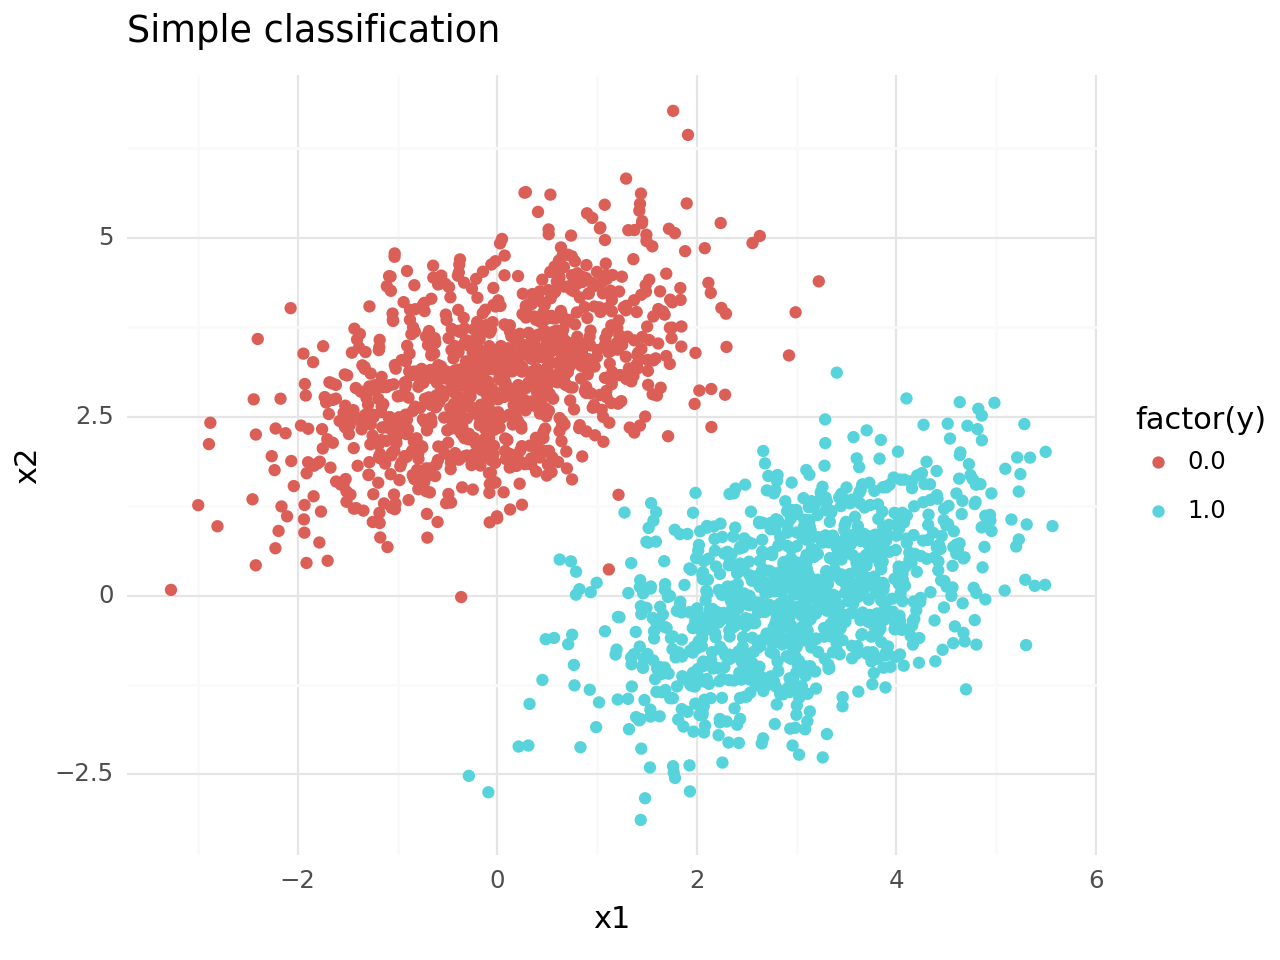

<Figure Size: (640 x 480)>

In [11]:

(
    ggplot(df, aes('x1', 'x2')) 
        + geom_point(aes(color = 'factor(y)'))
        + theme_minimal()
        + labs(title = 'Simple classification')
)

In [12]:
# Bước 1: Khai báo các tham số 
input_dim = 2       # Số lượng biến - dim(x1, x2) = 2       
output_dim = 1      # Số lượng output đầu ra - dim(y) = 1
# Khai báo weights ban đầu
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
# Khai báo trọng số b ban đầu - default = 0
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [13]:
# Hàm tính kết quả dự báo prediction
def model(inputs):
    return tf.matmul(inputs, W) + b

In [14]:
# Trả ra kết quả tính loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    # Trả ra kết quả average của per_sample_losses
    return tf.reduce_mean(per_sample_losses)

In [15]:
# Tốc độ máy học
learning_rate = 0.1
def training_step(inputs, targets):
    # Tính loss function với từng giá trị của W & b
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    # Tính đạo hàm với W & b tại giá trị của X
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    # Update W,b theo giá trị mới
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    # Trả ra giá trị loss mới
    return loss

In [16]:
# Training với 40 step
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.6380
Loss at step 1: 0.2430
Loss at step 2: 0.1237
Loss at step 3: 0.1032
Loss at step 4: 0.0951
Loss at step 5: 0.0891
Loss at step 6: 0.0837
Loss at step 7: 0.0787
Loss at step 8: 0.0742
Loss at step 9: 0.0701
Loss at step 10: 0.0663
Loss at step 11: 0.0628
Loss at step 12: 0.0596
Loss at step 13: 0.0566
Loss at step 14: 0.0539
Loss at step 15: 0.0515
Loss at step 16: 0.0492
Loss at step 17: 0.0471
Loss at step 18: 0.0452
Loss at step 19: 0.0435
Loss at step 20: 0.0419
Loss at step 21: 0.0404
Loss at step 22: 0.0390
Loss at step 23: 0.0378
Loss at step 24: 0.0367
Loss at step 25: 0.0356
Loss at step 26: 0.0347
Loss at step 27: 0.0338
Loss at step 28: 0.0330
Loss at step 29: 0.0322
Loss at step 30: 0.0316
Loss at step 31: 0.0309
Loss at step 32: 0.0304
Loss at step 33: 0.0299
Loss at step 34: 0.0294
Loss at step 35: 0.0289
Loss at step 36: 0.0285
Loss at step 37: 0.0282
Loss at step 38: 0.0278
Loss at step 39: 0.0275


Như vậy, ta đã hoàn thành việc xây dựng mô hình đơn giản neural network.

## Keras

Keras cho phép xây dựng mô hình DL nhanh chóng, thành phần của keras có các bước chính sau

- `Layers`: Khai báo kiến trúc của mạng neural. Bao gồm:
    - Dữ liệu đầu vào
    - Dữ liệu đầu ra
    - Hàm activation

```python
model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=64, activation="relu"),
    NaiveDense(input_size=64, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
    ])
```

- `Compile`: Bước khai báo các tham số phục vụ việc tính toán các tham số tối ưu cho mô hình:
    - `Loss functions`: Hàm mất mát - là giá trị sẽ được tối ưu trong quá trình training - ví dụ: `mean square error`, `CategoricalCrossentropy`,...
    - `Optimizer`: Thuật toán cho phép tối ưu, là các biến thể khác nhau của Stochastic Gradient Descent (SGD) như `Adam`, `SGD`
    - `Metrics`: Chỉ số dùng để đo lường sự thành công của mô hình. Không giống như `loss function`, chỉ số này không được đo lường trực tiếp thông qua quá trình xây dựng mô hình như `AUC`, `CategoricalAccuracy`

```python
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])
```

**Lưu ý**: Metrics là chỉ số ta muốn sử dụng để đo lường sự thành công của mô hình - đặc tính của chỉ số này thường là càng cao càng tốt. Tuy nhiên, chỉ số này không dễ dàng để có thể tối ưu mà phải sử dụng thông qua một chỉ số khác là `loss function`

Ví dụ: Mục tiêu cần tối ưu là mục tiêu trừu tượng *gia tăng sự giàu có cho mỗi người dân* - nếu không có loss function, rất có thể sẽ đưa ra phương án tiêu diệt một số lượng lớn người dân!

- `fit`: Bước trực tiếp xây dựng và tối ưu hóa mô hình
    - data: input & output
    - epoch: là số lần toàn bộ dữ liệu được huấn luyện (theo chiều dọc) - epoch lớn sẽ cho mô hình học đi học lại dữ liệu nhiều lần, dễ bị overfitting
    - `batchsize`: Batch size là số lượng mẫu dữ liệu được đưa vào mô hình để huấn luyện trong một lần truyền tiến (forward pass) và truyền ngược (backward pass). Một batch là một tập hợp con của tập dữ liệu huấn luyện.

```python
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)
```

![](image/p03-01-batch-epoch.ppm)

## Các mô hình cơ bản

Trong nội dung tiếp theo, ta sẽ thực hiện 3 mô hình cơ bản của học máy:

- Phân loại nhị phân - binary classification
- Phân loại nhiều nhóm
- Bài toán hồi quy - regression

### Phân loại nhị phân

Trong ví dụ này, ta sử dụng dữ liệu `IMDB` review, chứa các nội dung đánh giá phim với 50% `positive` & 50% `negative`. Dữ liệu review đã được chuyển đổi thành dạng số với mỗi số đại diện cho 1 từ trong từ điển.

In [17]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [28]:
train_data.shape

(25000,)

In [36]:
# Review đầu tiên
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [21]:
train_labels[0]

1

In [31]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# Review đầu tiên
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [30]:
# Nội dung review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [34]:
# Review thứ 2
" ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

Ta chưa thể xây dựng mô hình trực tiếp mà phải chuyển đổi đổi thành định dạng dữ liệu có cùng kích thước dưới dạng ma trận 0-1 có kích thước 25000 x 10000 (25000 lượt review x 10000 các từ có trong 25000 lượt review này)

In [40]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Tạo ma trận 0
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # Xác định vị trí tồn tại word để đặt bằng 1
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [39]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [42]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

Ta có thể xây dựng mô hình đơn giản với kiến trúc như sau:

![](image/p01-03-binary-classification.png)

In [43]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    # Output định dạng xác suất với hàn sigmoid
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [46]:
# Xây dựng mô hình
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6946 - loss: 0.6043 - val_accuracy: 0.8548 - val_loss: 0.4212
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8906 - loss: 0.3597 - val_accuracy: 0.8463 - val_loss: 0.3722
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9147 - loss: 0.2671 - val_accuracy: 0.8767 - val_loss: 0.3146
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9309 - loss: 0.2142 - val_accuracy: 0.8779 - val_loss: 0.2996
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9431 - loss: 0.1779 - val_accuracy: 0.8876 - val_loss: 0.2767
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9484 - loss: 0.1570 - val_accuracy: 0.8854 - val_loss: 0.2884
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9604 - loss: 0.1280 - val_accuracy: 0.8783 - val_loss: 0.3057
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9659 - loss: 0.1158 - val_accuracy: 0.8842 - val_loss

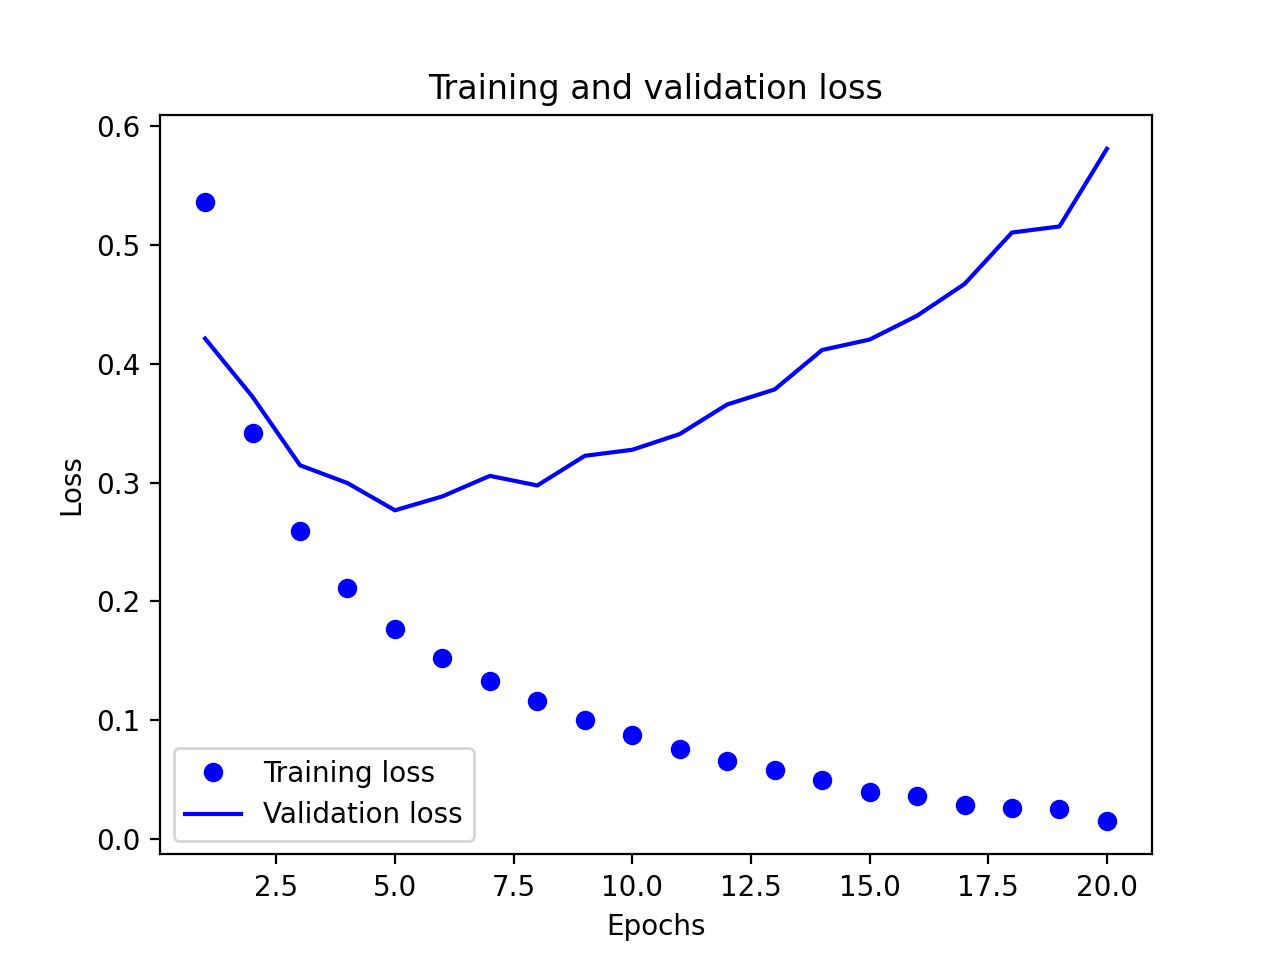

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Với kết quả như trên, ta có thể thấy hàm `loss function` giảm liên tục trên tập train nhưng tăng dần ở validation với mức epoch = 5. Ta có thể xây dựng lại mô hình như sau

In [54]:
model = keras.Sequential([
                layers.Dense(16, activation="relu"),
                layers.Dense(16, activation="relu"),
                layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
            loss="binary_crossentropy",
            metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7274 - loss: 0.5762
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8986 - loss: 0.3038
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9175 - loss: 0.2295
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.1900
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8840 - loss: 0.2837


[0.28319352865219116, 0.8858399987220764]

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

In [51]:
# Dự báo trên tập dữ liệu mới
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[0.25915012],
       [0.9997451 ],
       [0.8726964 ],
       ...,
       [0.13297063],
       [0.07732651],
       [0.64449096]], dtype=float32)